In [1]:
import warnings
warnings.simplefilter("ignore")

from dostoevsky.models import FastTextSocialNetworkModel
from dostoevsky.tokenization import RegexTokenizer
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd

Using TensorFlow backend.


In [2]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [3]:
def predictions_to_df(lines, predictions, text_type):
    """Converts information from Dostoyevsky predictions to a pandas
    dataframe for convenient work.
    
    :arg lines (list of str) - texts sentiment analysis was written on
    :arg predictions (list of dict-like) - resulting predictions with
        probabilities of different sentiments
    
    :returns df (pandas.DataFrame) - same data but in table-like format
    """
    sentiments_list = ["positive", "neutral", "negative", "skip"]
    df_dict = {
        "play": [],
        "lemmas": [],
        "direction": [],
        "positive": [],
        "neutral": [],
        "negative": [],
        "skip": []
    }
    is_lemmas = True if text_type == "lemmas" else False
    for line, line_sentiment in zip(lines, predictions):
        df_dict["play"].append(play)
        df_dict["lemmas"].append(True)
        df_dict["direction"].append(line)
        for sent in sentiments_list:
            if sent in line_sentiment:
                df_dict[sent].append(line_sentiment[sent])
            else:
                df_dict[sent].append(0)
    df = pd.DataFrame.from_dict(df_dict)
    return df

In [4]:
def sentiment_analysis_pipeline(play_name, source, text_type, model):
    """Quick sentiment analysis process, assembled in a single function.
    
    :arg play_name (str) - name of a play
    :arg source (str) - text to analyze
        values: "stage", "spoken"
    :arg text_type (str) - kind of text (processed/non-processed)
        values: "raw", "stage"
    :arg model (dostoevsky.models.FastTextSocialNetworkModel) - sentiment
    analysis model to use
    
    :result Shows a figure of sentiment probability distribution as a result.
    :saves fig (matplotlib.pyplot.fig) - histogram of sentiment probability
    """
    with open("./data/{}_{}/{}.txt".format(source, text_type, play_name), "r", encoding="utf-8") as f:
        lines = [l.strip("\n") for l in f.readlines()]
    results = model.predict(lines, k=2)
    
    df = predictions_to_df(lines, results, text_type)
    
    fig = plt.figure(figsize=(16,6))
    plt.title("Distribution of sentiment probability: {}, {}, {}".format(play_name, source, text_type))
    plt.xlabel("Sentiment probability")
    plt.ylabel("Amount of lines")
    ax = fig.gca()
    df[["positive", "negative", "neutral", "skip"]].plot.hist(ax=ax, bins=100, alpha=0.3);
    # plt.show()
    
    fig.savefig("./data/figures/{}_{}-{}.png".format(play_name, source, text_type), dpi=600)

Все параметры:

In [5]:
with open("./data/play_list.txt", "r", encoding="utf-8") as f:
    play_names = [l.strip("\n") for l in f.readlines()]
sources = ["spoken", "stage"]
text_types = ["raw", "lemmas"]

Папка для картинок:

In [6]:
if not os.path.exists("./data/figures"):
    os.mkdir("./data/figures")
    print("Created a folder")
else:
    print("Folder already existed")

Folder already existed


Запускаем:


100%|██████████| 10/10 [03:32<00:00, 21.25s/it]


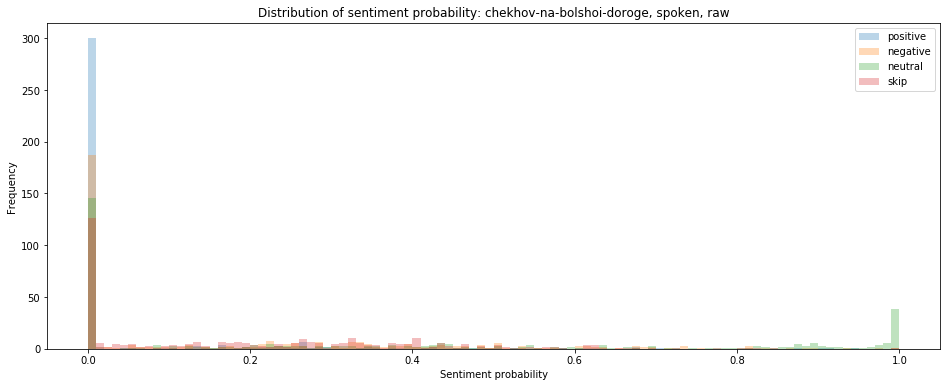

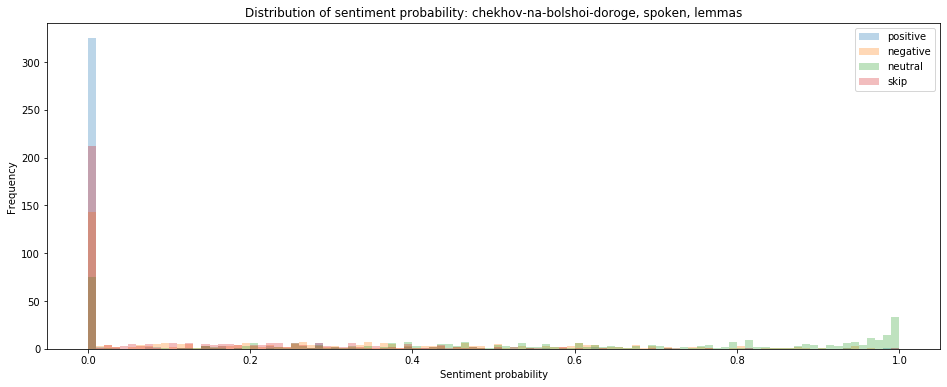

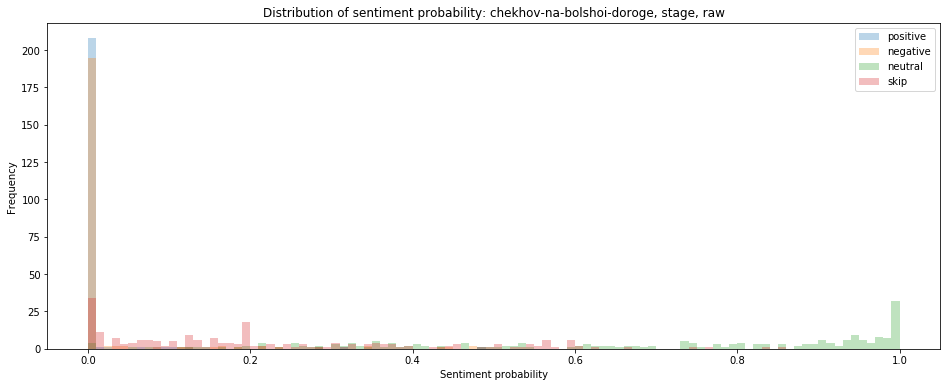

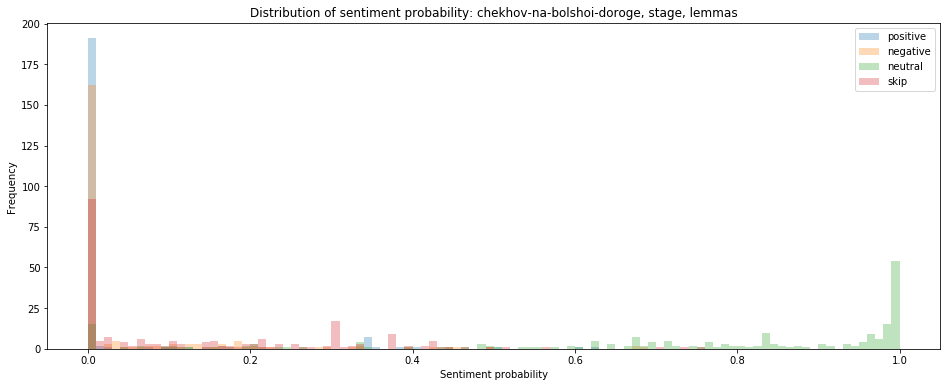

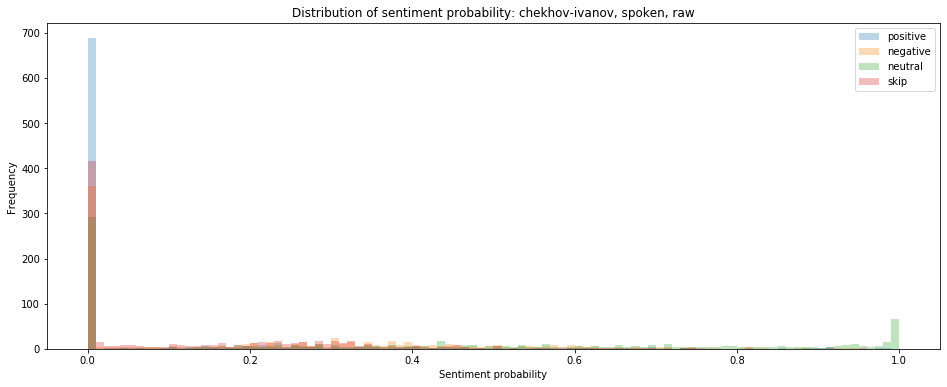

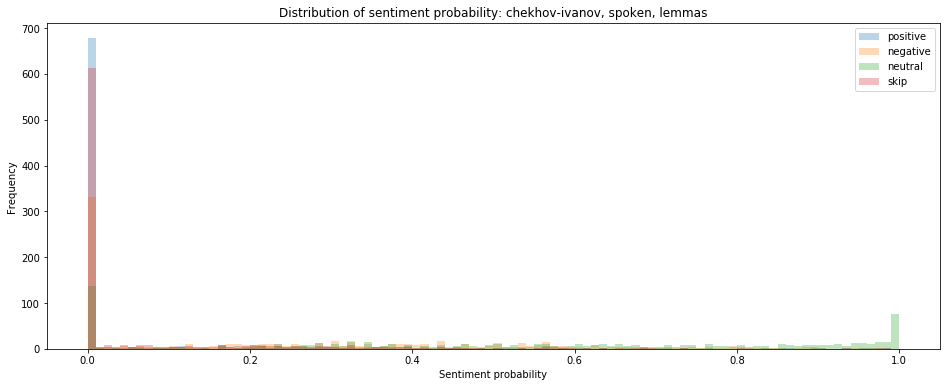

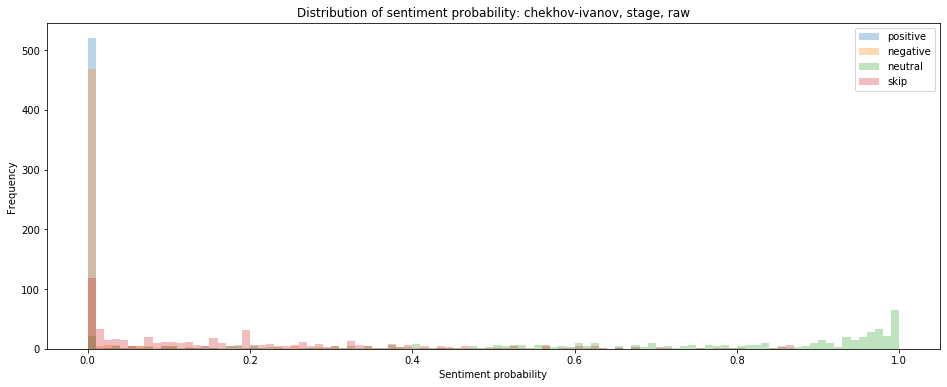

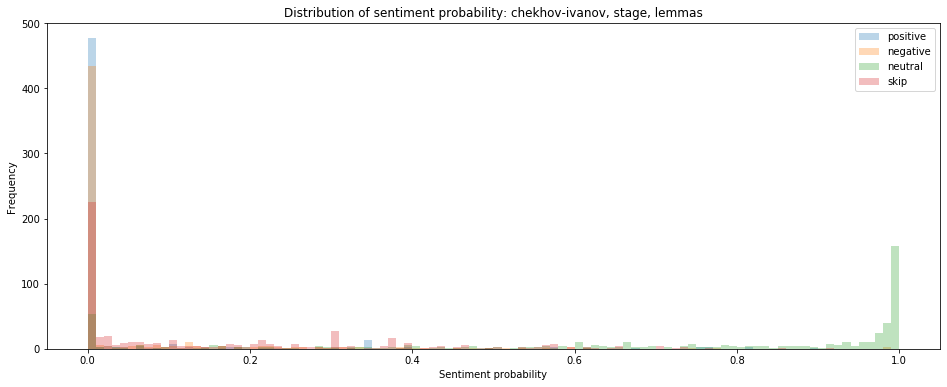

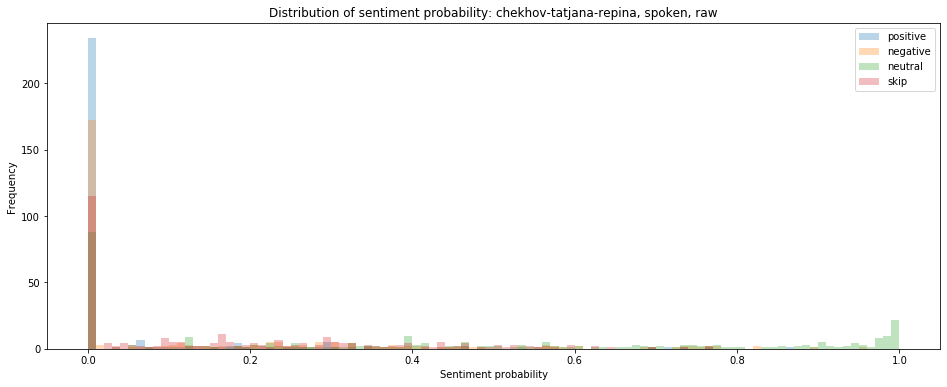

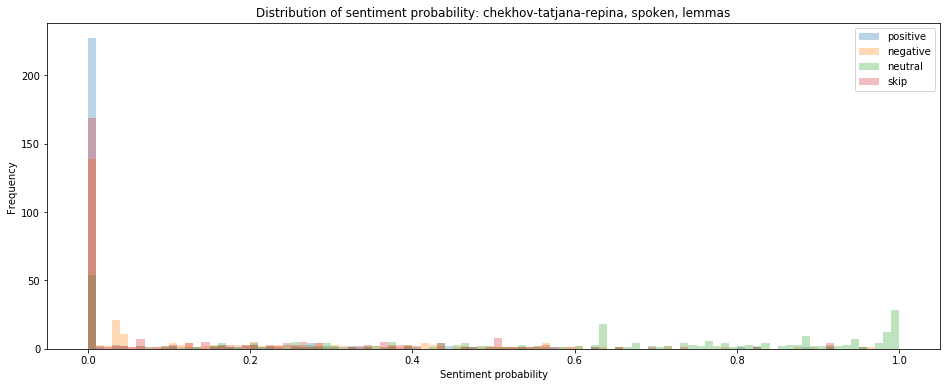

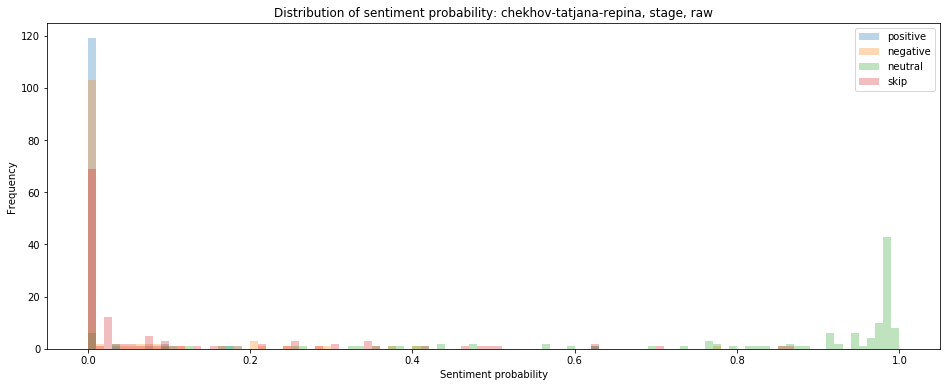

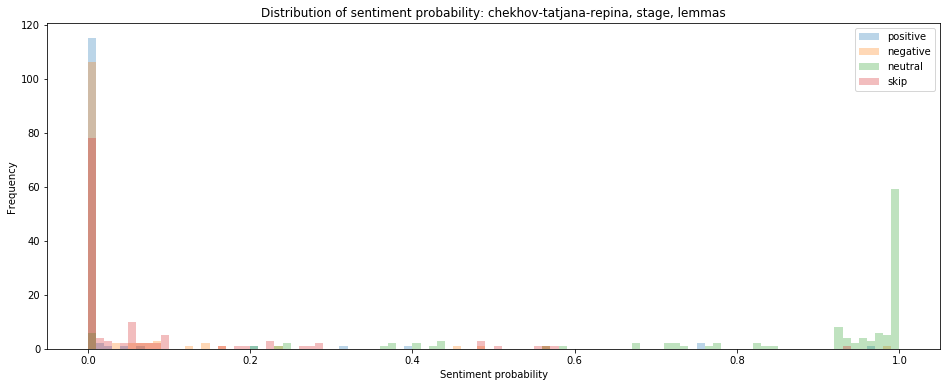

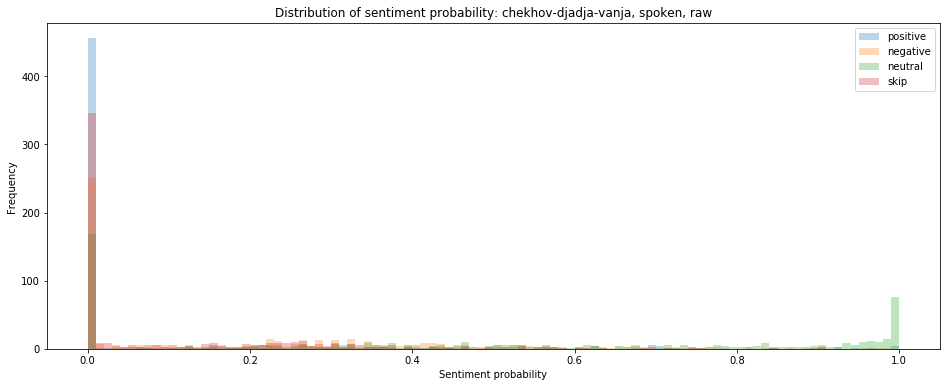

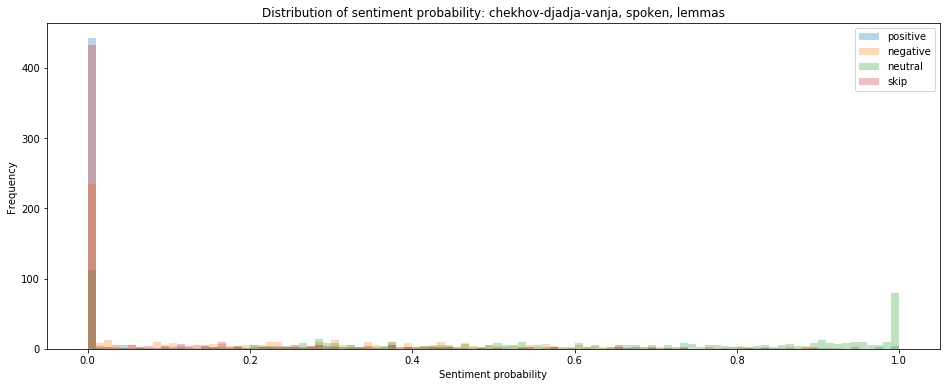

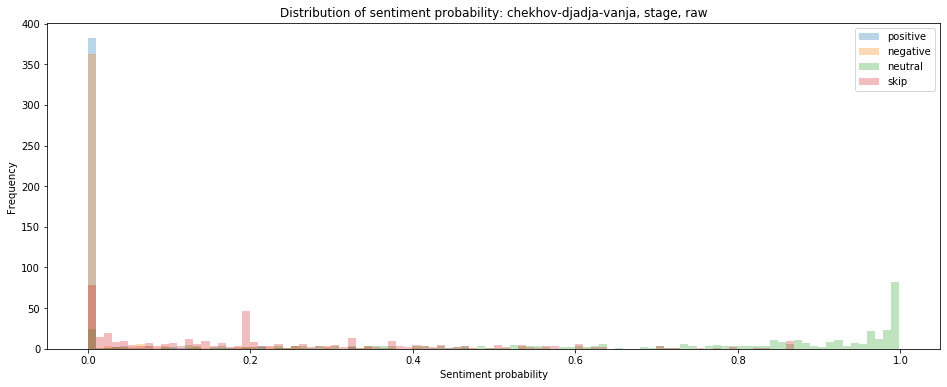

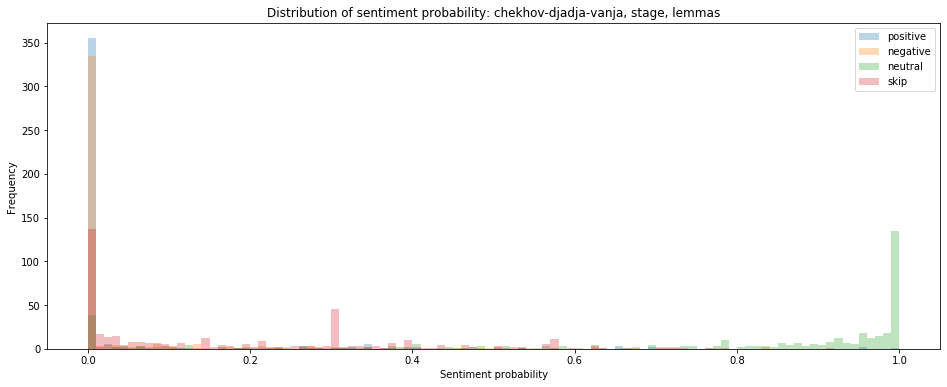

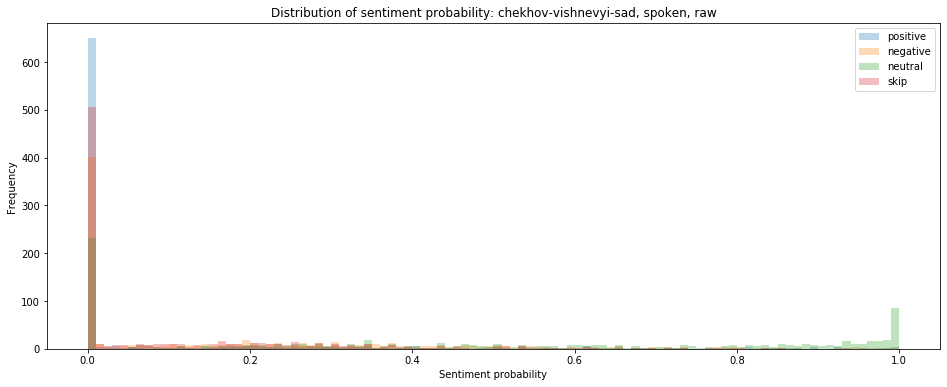

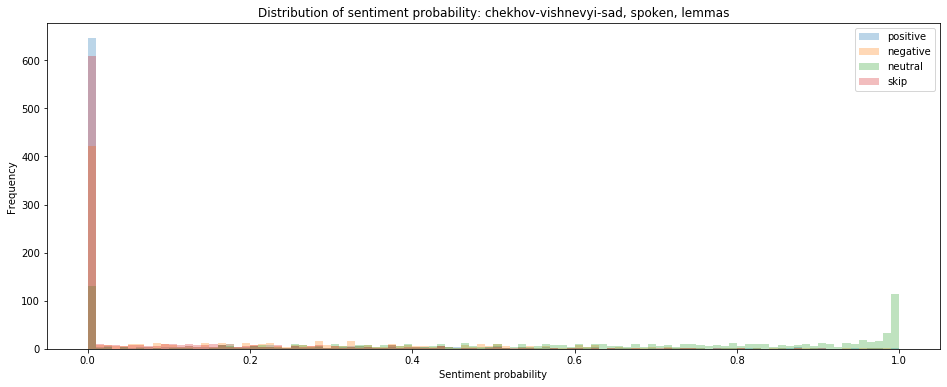

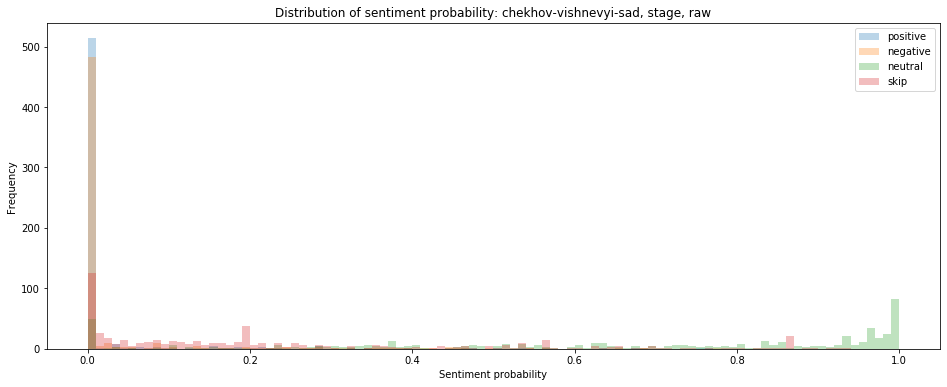

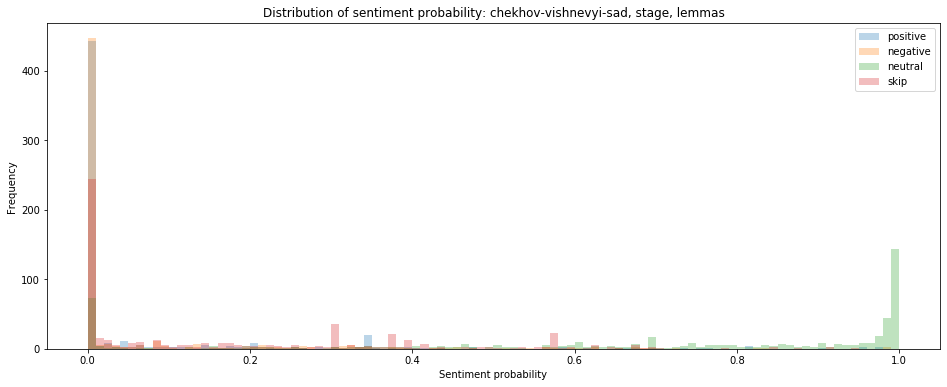

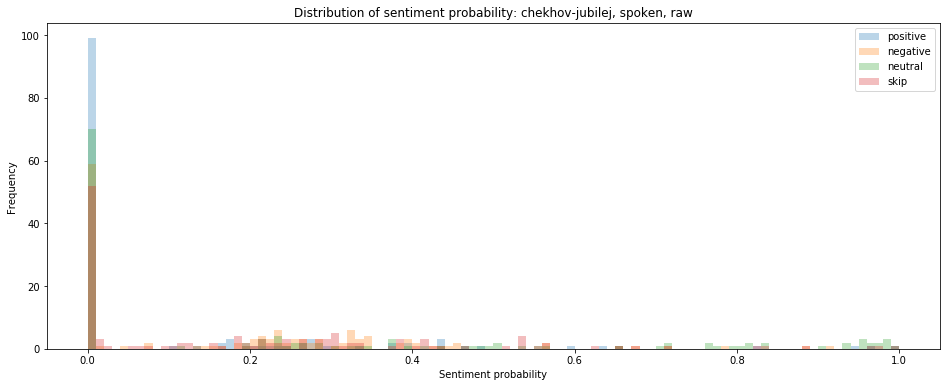

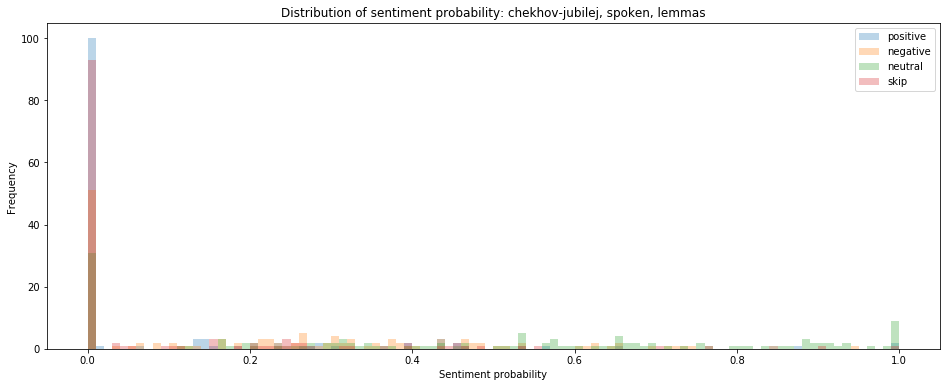

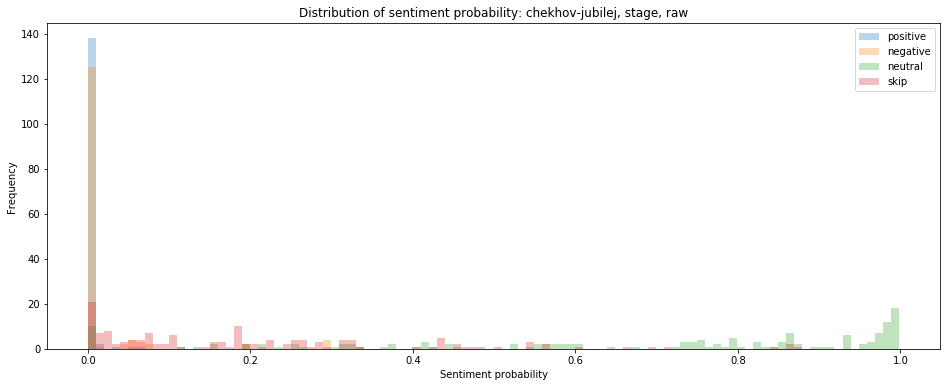

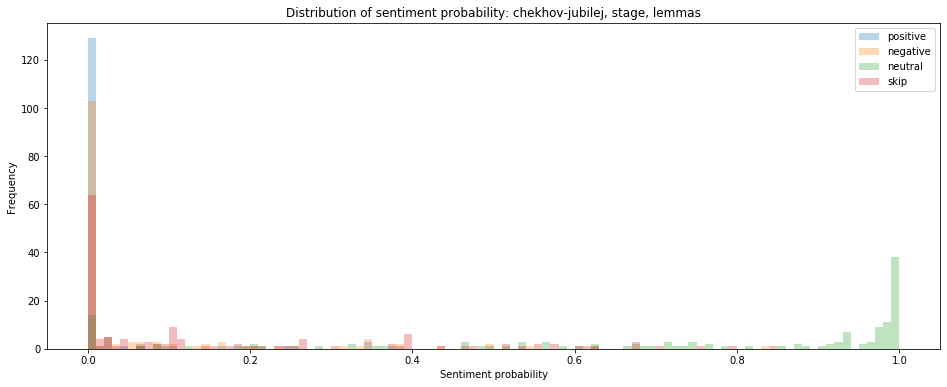

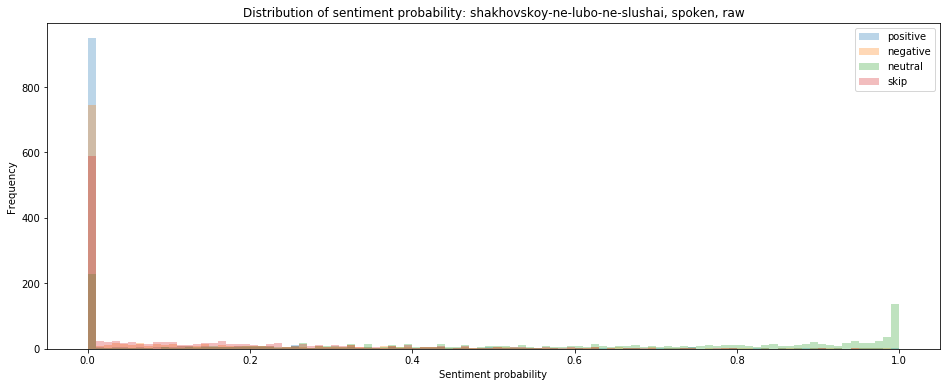

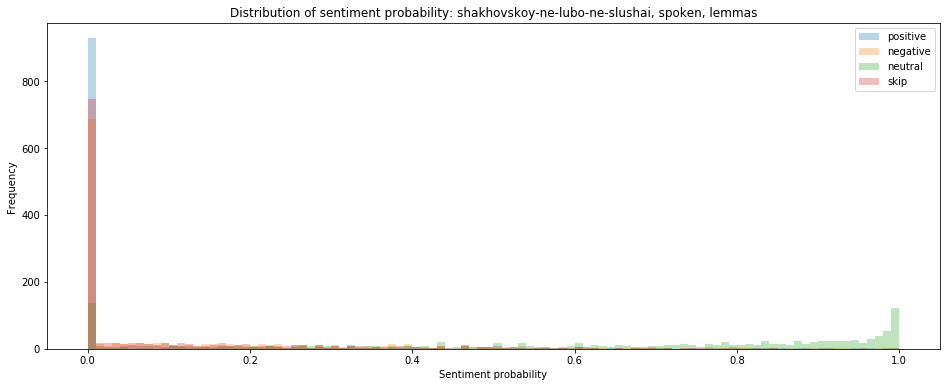

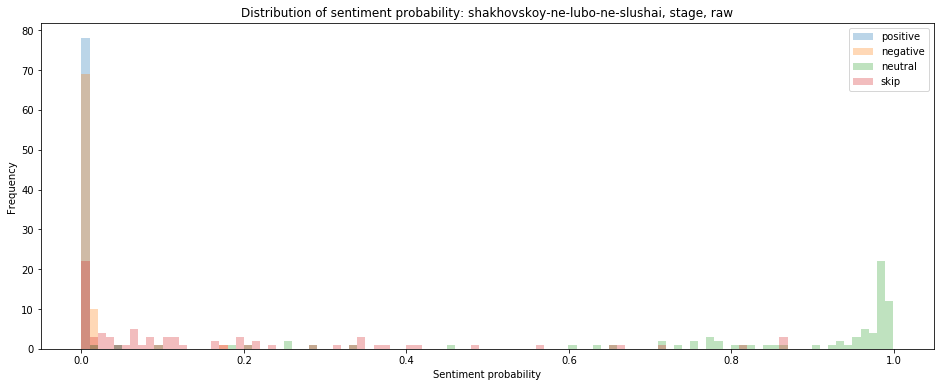

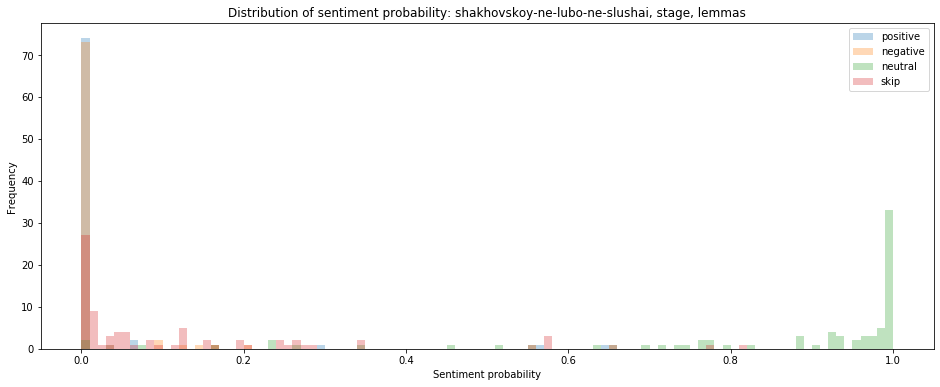

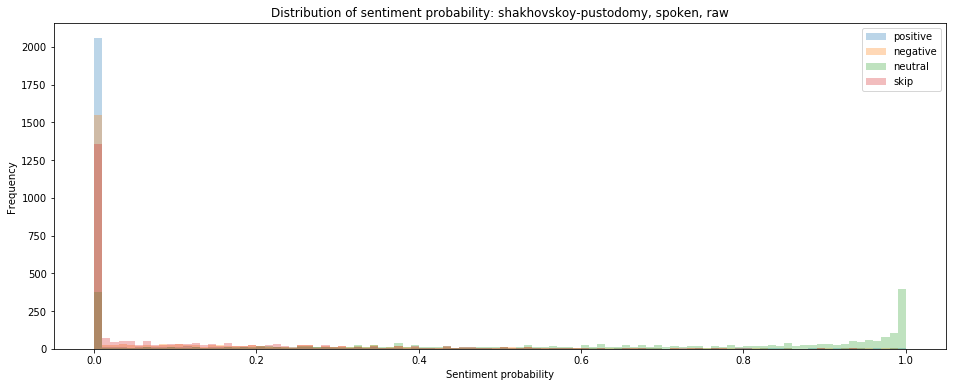

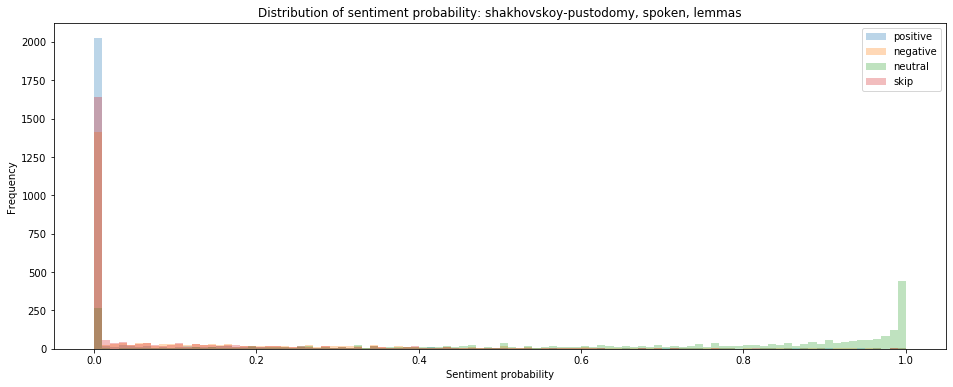

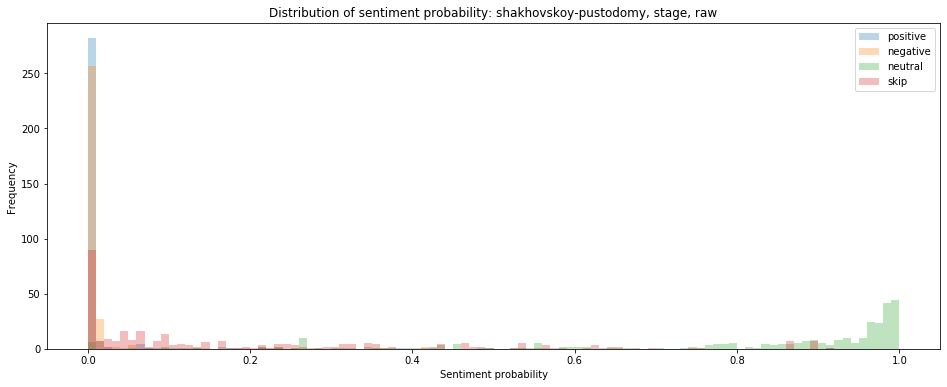

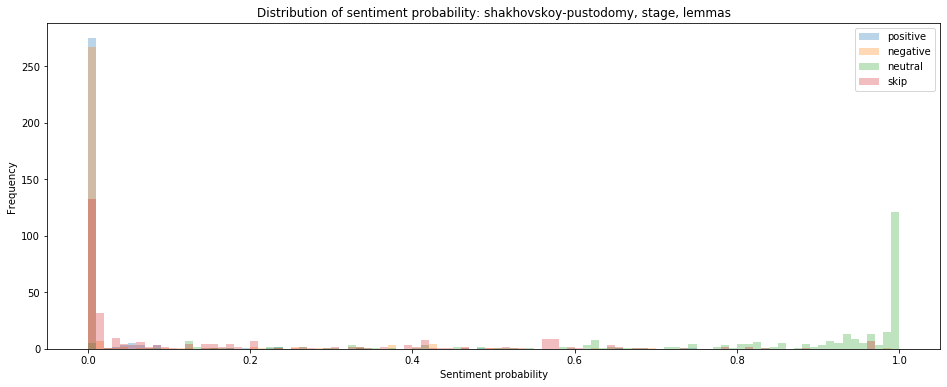

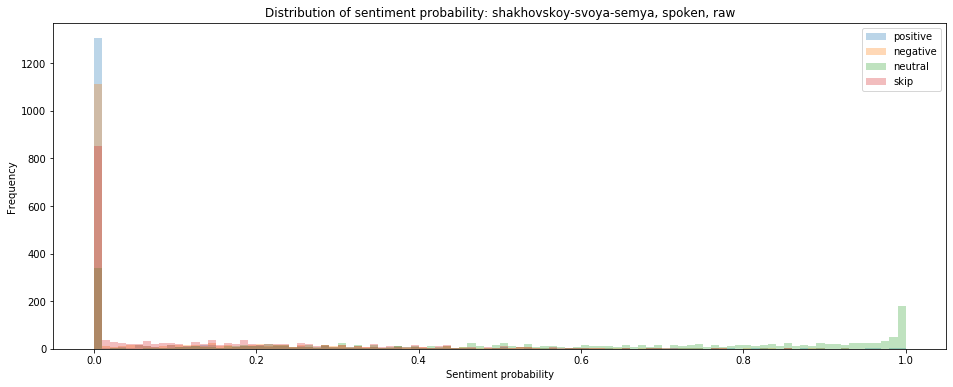

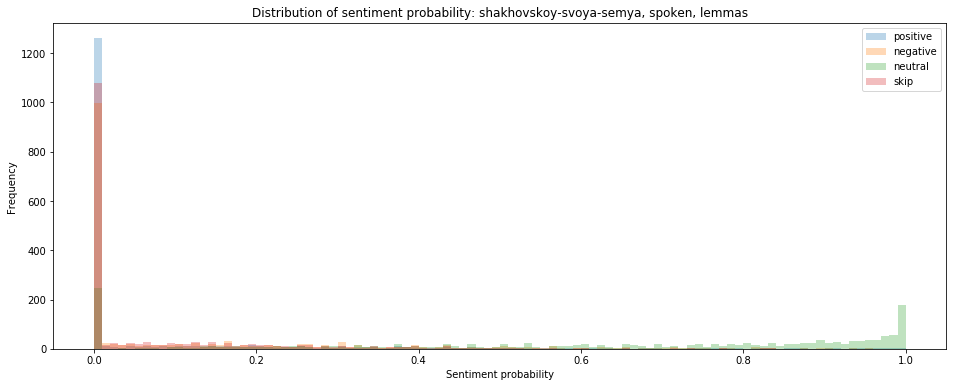

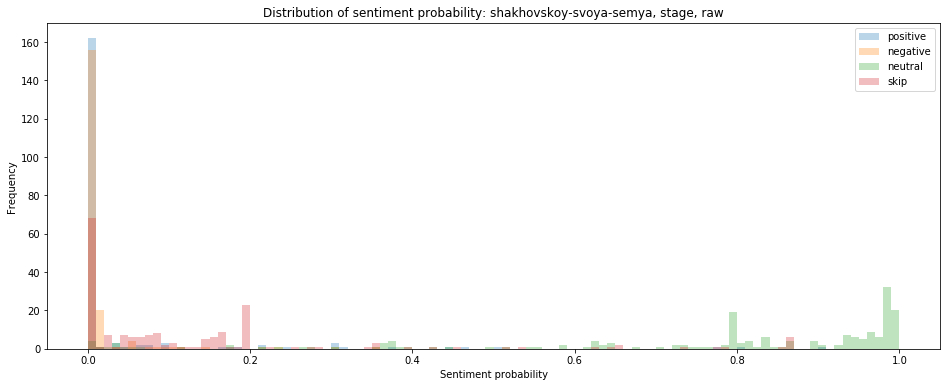

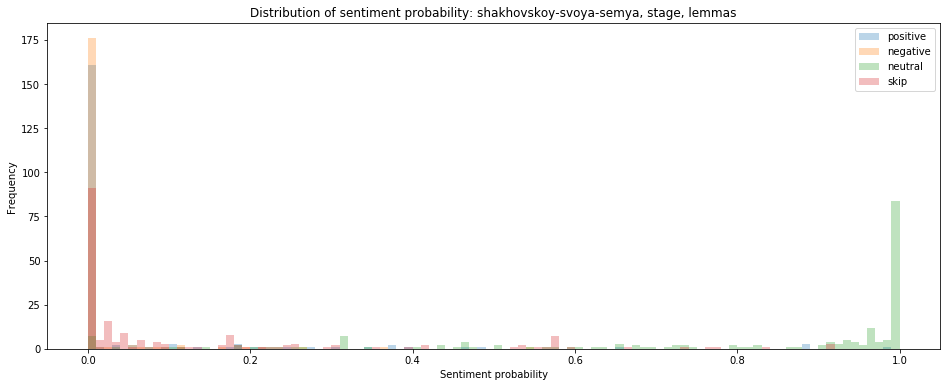

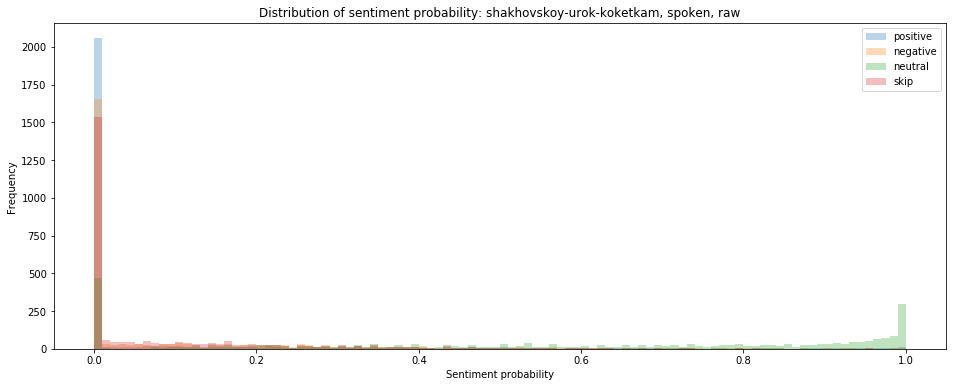

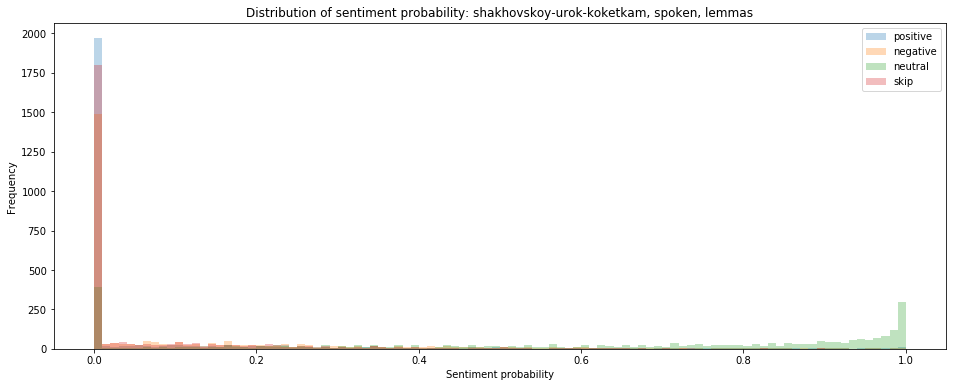

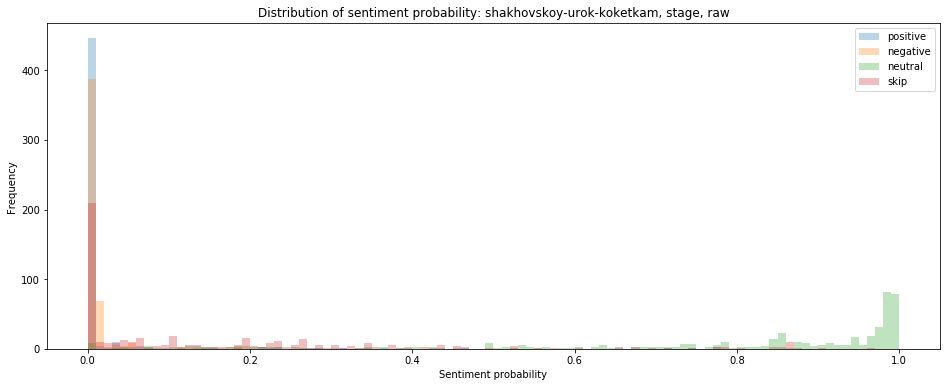

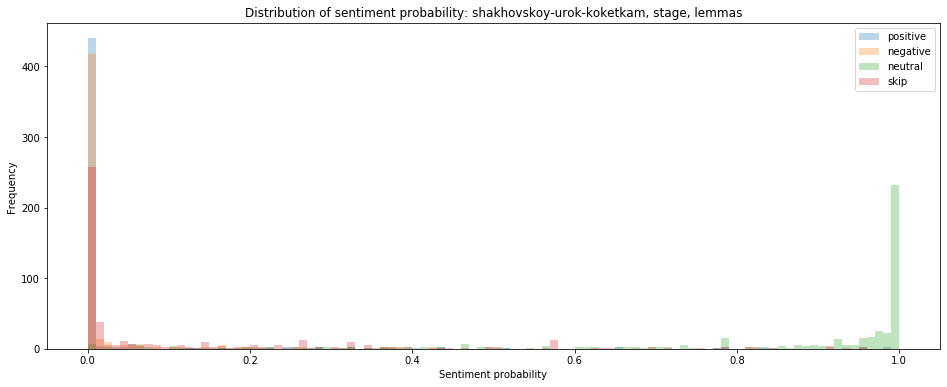

In [8]:
for play in tqdm(play_names[200:]):
    for source in sources:
        for ttype in text_types:
            sentiment_analysis_pipeline(play, source, ttype, model)